# SVC non-linear classification

In this highly simplified scenario, you need to work out if an applicant should be approved for credit based on:
•	Saving
•	Earnings
•	Acceptance/rejection data for previous applications 

cs1 and cs2 are the test data

[0.]
Likely default


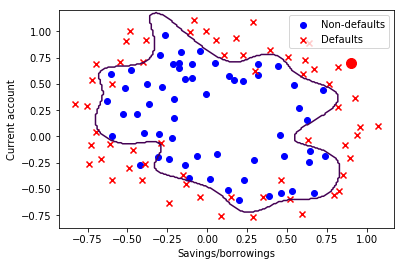

In [2]:
import numpy as np
from numpy import loadtxt, where
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
import scipy
import warnings
warnings.filterwarnings("ignore") 

data = np.genfromtxt("nonlineardata.txt", delimiter=",").T 

x = data[0]

y = data[1]

z = data[2]

X = np.column_stack((x, y))

pos = where(z >0.5)
neg = where(z <0.5)
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b', label = 'Non-defaults')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r', label = 'Defaults')

plt.xlabel('Savings/borrowings')
plt.ylabel('Current account')

C = 100  

clf = svm.SVC(kernel = 'rbf',  gamma=8, C=C )
clf.fit(X, z)

h = 0.01  
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0])

cs1 = .9
cs2 = .7

P = clf.predict([[cs1,cs2]])

print(P)

cand = np.column_stack((cs1, cs2))

if P==1:
    plt.scatter(cand[:, 0], cand[:, 1], s=100, c='g')
    print("Unlikely to default")
else:
    plt.scatter(cand[:, 0], cand[:, 1], s=100, c='r')
    print("Likely default")

plt.legend(loc='upper right')

plt.show()